# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 12.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 12.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 20.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.0 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp28 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [10]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [12]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track) #,locations = locations)   #Use either track or locations

1328058788662767617
1328058788935503872
1328058789057208321
1328058789019480064
1328058788906229763
1328058789187252224
1328058789518569474
1328058789426200576
1328058789849833474
1328058789736689665
1328058789971566596
1328058789988364291
1328058790089019393
1328058789799596032
1328058790160314368
1328058790781079552
1328058790910935040
1328058790869147653
1328058790864818176
1328058790894333953
1328058791104012289
1328058791582162944
1328058791565385731
1328058791435382795
1328058791678464000
1328058791720468480
1328058791745687553
1328058791682658304
1328058791733186561
1328058791850631168
1328058792064544769
1328058792102117376
1328058792236511232
1328058792529907712
1328058792483893250
1328058792605483008
1328058792680902656
1328058792739794948
1328058792869814279
1328058792949411840
1328058792995663872
1328058793171759104
1328058793234731008
1328058793444433920
1328058792932646912
1328058793268285447
1328058793570123777
1328058793717092355
1328058793624801284
1328058793113104385


1328058830916374528
1328058831314759682
1328058831448940544
1328058831436443649
1328058831700680704
1328058831935594496
1328058831973265408
1328058832367579137
1328058832342364160
1328058832413716480
1328058832497553409
1328058832426299392
1328058832703123461
1328058832627654659
1328058832728285184
1328058832539545601
1328058833105809409
1328058833030279169
1328058833336487937
1328058833269190656
1328058833411903489
1328058833391022080
1328058833428770816
1328058833479102466
1328058833336479744
1328058833571377155
1328058832279404544
1328058833474752512
1328058833768509441
1328058833944551424
1328058834045333507
1328058833835601931
1328058833810309120
1328058834158448640
1328058834187939842
1328058834280210432
1328058834347196416
1328058834414407681
1328058834758234112
1328058834850639874
1328058834955464704
1328058835328663553
1328058835328614400
1328058835643355142
1328058835580428290
1328058835089682433
1328058835987099649
1328058836201181191
1328058836327018496
1328058836431802368


1328058873534562305
1328058873509421056
1328058873601781763
1328058873828286464
1328058873736007680
1328058873710866433
1328058873731805186
1328058874159648768
1328058874222534656
1328058874130092032
1328058874398609408
1328058874360963074
1328058874612551683
1328058874566471682
1328058874981724162
1328058874981658624
1328058874910306304
1328058874981732353
1328058875061350400
1328058875036241920
1328058875120152576
1328058875061428231
1328058875120070656
1328058875329777667
1328058875199840258
1328058875178782725
1328058875552133129
1328058875484934145
1328058875082276864
1328058875422060545
1328058875384389634
1328058875593977856
1328058875619258368
1328058875535212544
1328058875472392193
1328058875728121857
1328058876063850497
1328058876277583873
1328058876244193280
1328058876265181185
1328058875447189505
1328058876420268032
1328058876625899520
1328058876705595394
1328058876458110978
1328058876600659969
1328058876734955523
1328058877015896066
1328058877133414403
1328058877347323904


1328058915100233731
1328058915335139328
1328058915389657089
1328058915570020355
1328058915599380480
1328058915599298560
1328058915641315329
1328058915779653633
1328058915871854593
1328058915804901377
1328058915880255488
1328058915880361984
1328058915955875842
1328058916262080512
1328058916475953152
1328058916727529472
1328058916660449287
1328058917205782528
1328058917352509440
1328058917461651457
1328058917985939460
1328058917985812481
1328058918031880192
1328058918082277376
1328058918057160705
1328058918199758848
1328058918325669894
1328058918564548609
1328058919017701380
1328058919533621248
1328058919562981377
1328058919504252928
1328058919487492096
1328058919734947841
1328058919772585984
1328058919755927552
1328058919785271308
1328058920070418434
1328058920305233920
1328058920401821700
1328058920468885504
1328058920313757696
1328058920393453568
1328058920498290689
1328058920670294016
1328058920758349824
1328058920787718145
1328058920762413056
1328058921010008067
1328058921072930816


1328058959182385152
1328058959429775360
1328058959090028544
1328058959345881089
1328058959371128832
1328058959559876612
1328058959484358657
1328058959832485888
1328058959694061569
1328058960017051648
1328058959924760576
1328058960025423873
1328058960260329473
1328058960503472128
1328058960096546816
1328058960474083333
1328058960155471874
1328058960423870465
1328058960667095041
1328058960843317252
1328058960792973312
1328058960948019200
1328058960868470785
1328058961233289216
1328058961040437250
1328058961375977474
1328058961443102721
1328058961489240071
1328058961631846402
1328058961602469888
1328058961724116994
1328058961614958592
1328058961199816709
1328058961652756480
1328058961929654272
1328058962147745793
1328058961996763137
1328058962391015438
1328058962474913800
1328058962504155136
1328058962906730496
1328058962827038720
1328058962881761282
1328058963141611521
1328058963091451905
1328058962965630978
1328058963078819848
1328058963296882689
1328058963166973955
1328058963297001474


1328059001196716032
1328059001204928512
1328059001322561537
1328059001184120834
1328059001318281216
1328059001360306179
1328059001892966402
1328059001670516736
1328059001959956480
1328059002052354049
1328059002006228993
1328059002253611009
1328059002438230017
1328059002354274304
1328059002396274688
1328059002463395842
1328059002635366400
1328059002270457858
1328059002715074567
1328059002765406209
1328059002886864897
1328059003063201792
1328059003201613827
1328059003520290818
1328059003734265859
1328059003918721024
1328059003822338048
1328059003931332610
1328059003910451203
1328059004048855041
1328059003780423680
1328059004052856833
1328059003990142979
1328059004036190208
1328059004396957696
1328059004447145984
1328059004694749184
1328059004912807937


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [13]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [14]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [15]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Nov 15 19:29:25 +0000 2020'
'Sun Nov 15 19:25:53 +0000 2020'
'Sun Nov 15 19:18:51 +0000 2020'
'Sun Nov 15 19:17:20 +0000 2020'
'Sun Nov 15 19:14:05 +0000 2020'
'Sun Nov 15 19:13:52 +0000 2020'
'Sun Nov 15 19:13:26 +0000 2020'
'Sun Nov 15 19:12:13 +0000 2020'
'Sun Nov 15 19:11:07 +0000 2020'
'Sun Nov 15 19:08:12 +0000 2020'
'Sun Nov 15 19:06:48 +0000 2020'
'Sun Nov 15 19:06:37 +0000 2020'
'Sun Nov 15 19:06:19 +0000 2020'
'Sun Nov 15 19:00:46 +0000 2020'
'Sun Nov 15 18:59:54 +0000 2020'
'Sun Nov 15 18:58:28 +0000 2020'
'Sun Nov 15 18:53:11 +0000 2020'
'Sun Nov 15 18:53:09 +0000 2020'
'Sun Nov 15 18:50:13 +0000 2020'
'Sun Nov 15 18:48:54 +0000 2020'
'Sun Nov 15 18:46:51 +0000 2020'
'Sun Nov 15 18:43:01 +0000 2020'
'Sun Nov 15 18:37:00 +0000 2020'
'Sun Nov 15 18:33:58 +0000 2020'
'Sun Nov 15 18:31:29 +0000 2020'
'Sun Nov 15 18:31:29 +0000 2020'
'Sun Nov 15 18:28:58 +0000 2020'
'Sun Nov 15 18:27:56 +0000 2020'
'Sun Nov 15 18:27:31 +0000 2020'
'Sun Nov 15 18:27:26 +0000 2020'
'Sun Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [16]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Nov 15 18:07:50 +0000 2020'
'Sun Nov 15 18:07:09 +0000 2020'
'Sun Nov 15 18:06:36 +0000 2020'
'Sun Nov 15 18:03:39 +0000 2020'
'Sun Nov 15 18:03:39 +0000 2020'
'Sun Nov 15 18:02:19 +0000 2020'
'Sun Nov 15 18:01:59 +0000 2020'
'Sun Nov 15 18:01:37 +0000 2020'
'Sun Nov 15 17:59:16 +0000 2020'
'Sun Nov 15 17:58:18 +0000 2020'
'Sun Nov 15 17:55:12 +0000 2020'
'Sun Nov 15 17:54:18 +0000 2020'
'Sun Nov 15 17:53:42 +0000 2020'
'Sun Nov 15 17:51:44 +0000 2020'
'Sun Nov 15 17:49:32 +0000 2020'
'Sun Nov 15 17:46:58 +0000 2020'
'Sun Nov 15 17:46:03 +0000 2020'
'Sun Nov 15 17:45:50 +0000 2020'
'Sun Nov 15 17:41:44 +0000 2020'
'Sun Nov 15 17:38:46 +0000 2020'
'Sun Nov 15 17:33:55 +0000 2020'
'Sun Nov 15 17:33:52 +0000 2020'
'Sun Nov 15 17:32:11 +0000 2020'
'Sun Nov 15 17:31:41 +0000 2020'
'Sun Nov 15 17:27:57 +0000 2020'
'Sun Nov 15 17:27:17 +0000 2020'
'Sun Nov 15 17:26:42 +0000 2020'
'Sun Nov 15 17:24:21 +0000 2020'
'Sun Nov 15 17:24:13 +0000 2020'
'Sun Nov 15 17:23:46 +0000 2020'
'Sun Nov 1

'Sun Nov 15 13:51:23 +0000 2020'
'Sun Nov 15 13:51:08 +0000 2020'
'Sun Nov 15 13:51:05 +0000 2020'
'Sun Nov 15 13:51:02 +0000 2020'
'Sun Nov 15 13:50:53 +0000 2020'
'Sun Nov 15 13:50:38 +0000 2020'
'Sun Nov 15 13:50:35 +0000 2020'
'Sun Nov 15 13:49:49 +0000 2020'
'Sun Nov 15 13:49:45 +0000 2020'
'Sun Nov 15 13:49:39 +0000 2020'
'Sun Nov 15 13:48:57 +0000 2020'
'Sun Nov 15 13:48:43 +0000 2020'
'Sun Nov 15 13:48:41 +0000 2020'
'Sun Nov 15 13:48:37 +0000 2020'
'Sun Nov 15 13:48:36 +0000 2020'
'Sun Nov 15 13:48:15 +0000 2020'
'Sun Nov 15 13:47:52 +0000 2020'
'Sun Nov 15 13:47:44 +0000 2020'
'Sun Nov 15 13:47:38 +0000 2020'
'Sun Nov 15 13:46:34 +0000 2020'
'Sun Nov 15 13:46:22 +0000 2020'
'Sun Nov 15 13:46:13 +0000 2020'
'Sun Nov 15 13:44:59 +0000 2020'
'Sun Nov 15 13:44:24 +0000 2020'
'Sun Nov 15 13:44:07 +0000 2020'
'Sun Nov 15 13:44:05 +0000 2020'
'Sun Nov 15 13:43:43 +0000 2020'
'Sun Nov 15 13:43:36 +0000 2020'
'Sun Nov 15 13:43:03 +0000 2020'
'Sun Nov 15 13:42:46 +0000 2020'
'Sun Nov 1

'Sat Nov 14 23:54:38 +0000 2020'
'Sat Nov 14 23:54:23 +0000 2020'
'Sat Nov 14 23:53:38 +0000 2020'
'Sat Nov 14 23:51:42 +0000 2020'
'Sat Nov 14 23:51:20 +0000 2020'
'Sat Nov 14 23:50:49 +0000 2020'
'Sat Nov 14 23:50:14 +0000 2020'
'Sat Nov 14 23:49:56 +0000 2020'
'Sat Nov 14 23:49:44 +0000 2020'
'Sat Nov 14 23:49:02 +0000 2020'
'Sat Nov 14 23:48:41 +0000 2020'
'Sat Nov 14 23:48:28 +0000 2020'
'Sat Nov 14 23:47:38 +0000 2020'
'Sat Nov 14 23:47:22 +0000 2020'
'Sat Nov 14 23:47:05 +0000 2020'
'Sat Nov 14 23:46:43 +0000 2020'
'Sat Nov 14 23:46:41 +0000 2020'
'Sat Nov 14 23:45:52 +0000 2020'
'Sat Nov 14 23:43:02 +0000 2020'
'Sat Nov 14 23:43:01 +0000 2020'
'Sat Nov 14 23:42:54 +0000 2020'
'Sat Nov 14 23:42:24 +0000 2020'
'Sat Nov 14 23:41:23 +0000 2020'
'Sat Nov 14 23:39:56 +0000 2020'
'Sat Nov 14 23:39:18 +0000 2020'
'Sat Nov 14 23:36:10 +0000 2020'
'Sat Nov 14 23:32:33 +0000 2020'
'Sat Nov 14 23:25:17 +0000 2020'
'Sat Nov 14 23:25:17 +0000 2020'
'Sat Nov 14 23:24:57 +0000 2020'
'Sat Nov 1

'Sat Nov 14 18:30:26 +0000 2020'
'Sat Nov 14 18:30:07 +0000 2020'
'Sat Nov 14 18:25:29 +0000 2020'
'Sat Nov 14 18:25:13 +0000 2020'
'Sat Nov 14 18:23:46 +0000 2020'
'Sat Nov 14 18:23:42 +0000 2020'
'Sat Nov 14 18:23:09 +0000 2020'
'Sat Nov 14 18:20:19 +0000 2020'
'Sat Nov 14 18:19:47 +0000 2020'
'Sat Nov 14 18:15:09 +0000 2020'
'Sat Nov 14 18:14:17 +0000 2020'
'Sat Nov 14 18:13:32 +0000 2020'
'Sat Nov 14 18:12:44 +0000 2020'
'Sat Nov 14 18:09:07 +0000 2020'
'Sat Nov 14 18:06:59 +0000 2020'
'Sat Nov 14 18:00:44 +0000 2020'
'Sat Nov 14 17:58:42 +0000 2020'
'Sat Nov 14 17:57:15 +0000 2020'
'Sat Nov 14 17:50:09 +0000 2020'
'Sat Nov 14 17:48:44 +0000 2020'
'Sat Nov 14 17:48:30 +0000 2020'
'Sat Nov 14 17:41:50 +0000 2020'
'Sat Nov 14 17:41:37 +0000 2020'
'Sat Nov 14 17:40:49 +0000 2020'
'Sat Nov 14 17:38:49 +0000 2020'
'Sat Nov 14 17:38:48 +0000 2020'
'Sat Nov 14 17:38:48 +0000 2020'
'Sat Nov 14 17:35:47 +0000 2020'
'Sat Nov 14 17:33:26 +0000 2020'
'Sat Nov 14 17:27:34 +0000 2020'
'Sat Nov 1

'Sat Nov 14 03:29:59 +0000 2020'
'Sat Nov 14 03:24:47 +0000 2020'
'Sat Nov 14 03:19:35 +0000 2020'
'Sat Nov 14 03:18:41 +0000 2020'
'Sat Nov 14 03:15:22 +0000 2020'
'Sat Nov 14 03:13:00 +0000 2020'
'Sat Nov 14 03:07:18 +0000 2020'
'Sat Nov 14 03:03:37 +0000 2020'
'Sat Nov 14 03:03:30 +0000 2020'
'Sat Nov 14 03:01:19 +0000 2020'
'Sat Nov 14 03:00:26 +0000 2020'
'Sat Nov 14 02:57:18 +0000 2020'
'Sat Nov 14 02:56:33 +0000 2020'
'Sat Nov 14 02:50:59 +0000 2020'
'Sat Nov 14 02:50:14 +0000 2020'
'Sat Nov 14 02:48:09 +0000 2020'
'Sat Nov 14 02:47:51 +0000 2020'
'Sat Nov 14 02:47:33 +0000 2020'
'Sat Nov 14 02:42:02 +0000 2020'
'Sat Nov 14 02:38:04 +0000 2020'
'Sat Nov 14 02:35:26 +0000 2020'
'Sat Nov 14 02:33:46 +0000 2020'
'Sat Nov 14 02:32:47 +0000 2020'
'Sat Nov 14 02:32:30 +0000 2020'
'Sat Nov 14 02:32:16 +0000 2020'
'Sat Nov 14 02:31:51 +0000 2020'
'Sat Nov 14 02:29:42 +0000 2020'
'Sat Nov 14 02:28:08 +0000 2020'
'Sat Nov 14 02:21:31 +0000 2020'
'Sat Nov 14 02:20:54 +0000 2020'
'Sat Nov 1

'Fri Nov 13 20:46:13 +0000 2020'
'Fri Nov 13 20:45:23 +0000 2020'
'Fri Nov 13 20:44:46 +0000 2020'
'Fri Nov 13 20:44:28 +0000 2020'
'Fri Nov 13 20:42:00 +0000 2020'
'Fri Nov 13 20:41:44 +0000 2020'
'Fri Nov 13 20:41:10 +0000 2020'
'Fri Nov 13 20:40:43 +0000 2020'
'Fri Nov 13 20:40:23 +0000 2020'
'Fri Nov 13 20:37:51 +0000 2020'
'Fri Nov 13 20:36:46 +0000 2020'
'Fri Nov 13 20:34:19 +0000 2020'
'Fri Nov 13 20:32:14 +0000 2020'
'Fri Nov 13 20:31:49 +0000 2020'
'Fri Nov 13 20:31:25 +0000 2020'
'Fri Nov 13 20:31:12 +0000 2020'
'Fri Nov 13 20:30:50 +0000 2020'
'Fri Nov 13 20:30:24 +0000 2020'
'Fri Nov 13 20:29:16 +0000 2020'
'Fri Nov 13 20:28:12 +0000 2020'
'Fri Nov 13 20:27:47 +0000 2020'
'Fri Nov 13 20:27:46 +0000 2020'
'Fri Nov 13 20:27:05 +0000 2020'
'Fri Nov 13 20:27:03 +0000 2020'
'Fri Nov 13 20:26:12 +0000 2020'
'Fri Nov 13 20:24:15 +0000 2020'
'Fri Nov 13 20:23:56 +0000 2020'
'Fri Nov 13 20:21:54 +0000 2020'
'Fri Nov 13 20:21:17 +0000 2020'
'Fri Nov 13 20:20:41 +0000 2020'
'Fri Nov 1

'Fri Nov 13 16:33:54 +0000 2020'
'Fri Nov 13 16:33:39 +0000 2020'
'Fri Nov 13 16:33:16 +0000 2020'
'Fri Nov 13 16:32:50 +0000 2020'
'Fri Nov 13 16:32:20 +0000 2020'
'Fri Nov 13 16:32:16 +0000 2020'
'Fri Nov 13 16:30:10 +0000 2020'
'Fri Nov 13 16:29:49 +0000 2020'
'Fri Nov 13 16:29:32 +0000 2020'
'Fri Nov 13 16:27:39 +0000 2020'
'Fri Nov 13 16:26:58 +0000 2020'
'Fri Nov 13 16:26:05 +0000 2020'
'Fri Nov 13 16:25:52 +0000 2020'
'Fri Nov 13 16:22:58 +0000 2020'
'Fri Nov 13 16:22:57 +0000 2020'
'Fri Nov 13 16:22:56 +0000 2020'
'Fri Nov 13 16:22:43 +0000 2020'
'Fri Nov 13 16:21:28 +0000 2020'
'Fri Nov 13 16:20:11 +0000 2020'
'Fri Nov 13 16:18:55 +0000 2020'
'Fri Nov 13 16:18:52 +0000 2020'
'Fri Nov 13 16:18:52 +0000 2020'
'Fri Nov 13 16:18:52 +0000 2020'
'Fri Nov 13 16:18:50 +0000 2020'
'Fri Nov 13 16:17:21 +0000 2020'
'Fri Nov 13 16:17:12 +0000 2020'
'Fri Nov 13 16:16:54 +0000 2020'
'Fri Nov 13 16:16:18 +0000 2020'
'Fri Nov 13 16:15:32 +0000 2020'
'Fri Nov 13 16:15:14 +0000 2020'
'Fri Nov 1

'Fri Nov 13 14:37:22 +0000 2020'
'Fri Nov 13 14:37:13 +0000 2020'
'Fri Nov 13 14:37:05 +0000 2020'
'Fri Nov 13 14:35:22 +0000 2020'
'Fri Nov 13 14:35:18 +0000 2020'
'Fri Nov 13 14:34:59 +0000 2020'
'Fri Nov 13 14:34:56 +0000 2020'
'Fri Nov 13 14:34:51 +0000 2020'
'Fri Nov 13 14:34:44 +0000 2020'
'Fri Nov 13 14:34:35 +0000 2020'
'Fri Nov 13 14:34:32 +0000 2020'
'Fri Nov 13 14:34:32 +0000 2020'
'Fri Nov 13 14:33:53 +0000 2020'
'Fri Nov 13 14:33:50 +0000 2020'
'Fri Nov 13 14:32:50 +0000 2020'
'Fri Nov 13 14:32:44 +0000 2020'
'Fri Nov 13 14:32:41 +0000 2020'
'Fri Nov 13 14:31:57 +0000 2020'
'Fri Nov 13 14:31:14 +0000 2020'
'Fri Nov 13 14:31:07 +0000 2020'
'Fri Nov 13 14:31:01 +0000 2020'
'Fri Nov 13 14:30:59 +0000 2020'
'Fri Nov 13 14:30:37 +0000 2020'
'Fri Nov 13 14:30:00 +0000 2020'
'Fri Nov 13 14:29:35 +0000 2020'
'Fri Nov 13 14:29:15 +0000 2020'
'Fri Nov 13 14:29:01 +0000 2020'
'Fri Nov 13 14:28:54 +0000 2020'
'Fri Nov 13 14:25:55 +0000 2020'
'Fri Nov 13 14:23:59 +0000 2020'
'Fri Nov 1

'Fri Nov 13 12:42:24 +0000 2020'
'Fri Nov 13 12:42:12 +0000 2020'
'Fri Nov 13 12:42:05 +0000 2020'
'Fri Nov 13 12:41:42 +0000 2020'
'Fri Nov 13 12:41:26 +0000 2020'
'Fri Nov 13 12:41:19 +0000 2020'
'Fri Nov 13 12:41:16 +0000 2020'
'Fri Nov 13 12:41:14 +0000 2020'
'Fri Nov 13 12:41:10 +0000 2020'
'Fri Nov 13 12:41:09 +0000 2020'
'Fri Nov 13 12:41:05 +0000 2020'
'Fri Nov 13 12:41:01 +0000 2020'
'Fri Nov 13 12:40:56 +0000 2020'
'Fri Nov 13 12:40:31 +0000 2020'
'Fri Nov 13 12:40:29 +0000 2020'
'Fri Nov 13 12:40:18 +0000 2020'
'Fri Nov 13 12:40:13 +0000 2020'
'Fri Nov 13 12:40:11 +0000 2020'
'Fri Nov 13 12:39:59 +0000 2020'
'Fri Nov 13 12:39:20 +0000 2020'
'Fri Nov 13 12:38:46 +0000 2020'
'Fri Nov 13 12:38:39 +0000 2020'
'Fri Nov 13 12:38:37 +0000 2020'
'Fri Nov 13 12:38:16 +0000 2020'
'Fri Nov 13 12:37:56 +0000 2020'
'Fri Nov 13 12:37:01 +0000 2020'
'Fri Nov 13 12:36:49 +0000 2020'
'Fri Nov 13 12:36:44 +0000 2020'
'Fri Nov 13 12:36:18 +0000 2020'
'Fri Nov 13 12:35:02 +0000 2020'
'Fri Nov 1

'Fri Nov 13 09:36:12 +0000 2020'
'Fri Nov 13 09:35:17 +0000 2020'
'Fri Nov 13 09:31:58 +0000 2020'
'Fri Nov 13 09:30:39 +0000 2020'
'Fri Nov 13 09:29:05 +0000 2020'
'Fri Nov 13 09:28:14 +0000 2020'
'Fri Nov 13 09:27:16 +0000 2020'
'Fri Nov 13 09:26:40 +0000 2020'
'Fri Nov 13 09:24:51 +0000 2020'
'Fri Nov 13 09:24:45 +0000 2020'
'Fri Nov 13 09:24:22 +0000 2020'
'Fri Nov 13 09:23:29 +0000 2020'
'Fri Nov 13 09:22:22 +0000 2020'
'Fri Nov 13 09:22:11 +0000 2020'
'Fri Nov 13 09:22:10 +0000 2020'
'Fri Nov 13 09:21:42 +0000 2020'
'Fri Nov 13 09:21:40 +0000 2020'
'Fri Nov 13 09:21:39 +0000 2020'
'Fri Nov 13 09:21:21 +0000 2020'
'Fri Nov 13 09:20:07 +0000 2020'
'Fri Nov 13 09:17:13 +0000 2020'
'Fri Nov 13 09:12:12 +0000 2020'
'Fri Nov 13 09:11:49 +0000 2020'
'Fri Nov 13 09:11:10 +0000 2020'
'Fri Nov 13 09:09:40 +0000 2020'
'Fri Nov 13 09:08:31 +0000 2020'
'Fri Nov 13 09:08:01 +0000 2020'
'Fri Nov 13 09:07:35 +0000 2020'
'Fri Nov 13 09:07:07 +0000 2020'
'Fri Nov 13 09:06:35 +0000 2020'
'Fri Nov 1

'Fri Nov 13 06:20:26 +0000 2020'
'Fri Nov 13 06:19:52 +0000 2020'
'Fri Nov 13 06:19:44 +0000 2020'
'Fri Nov 13 06:19:31 +0000 2020'
'Fri Nov 13 06:18:49 +0000 2020'
'Fri Nov 13 06:17:27 +0000 2020'
'Fri Nov 13 06:17:07 +0000 2020'
'Fri Nov 13 06:17:02 +0000 2020'
'Fri Nov 13 06:16:22 +0000 2020'
'Fri Nov 13 06:15:58 +0000 2020'
'Fri Nov 13 06:15:48 +0000 2020'
'Fri Nov 13 06:15:35 +0000 2020'
'Fri Nov 13 06:14:53 +0000 2020'
'Fri Nov 13 06:14:48 +0000 2020'
'Fri Nov 13 06:14:13 +0000 2020'
'Fri Nov 13 06:14:08 +0000 2020'
'Fri Nov 13 06:14:04 +0000 2020'
'Fri Nov 13 06:13:51 +0000 2020'
'Fri Nov 13 06:13:24 +0000 2020'
'Fri Nov 13 06:12:57 +0000 2020'
'Fri Nov 13 06:12:42 +0000 2020'
'Fri Nov 13 06:11:26 +0000 2020'
'Fri Nov 13 06:11:03 +0000 2020'
'Fri Nov 13 06:10:18 +0000 2020'
'Fri Nov 13 06:09:25 +0000 2020'
'Fri Nov 13 06:09:20 +0000 2020'
'Fri Nov 13 06:08:50 +0000 2020'
'Fri Nov 13 06:08:47 +0000 2020'
'Fri Nov 13 06:08:36 +0000 2020'
'Fri Nov 13 06:08:26 +0000 2020'
'Fri Nov 1

'Fri Nov 13 01:36:12 +0000 2020'
'Fri Nov 13 01:36:08 +0000 2020'
'Fri Nov 13 01:35:57 +0000 2020'
'Fri Nov 13 01:34:20 +0000 2020'
'Fri Nov 13 01:34:00 +0000 2020'
'Fri Nov 13 01:32:19 +0000 2020'
'Fri Nov 13 01:31:38 +0000 2020'
'Fri Nov 13 01:30:13 +0000 2020'
'Fri Nov 13 01:29:51 +0000 2020'
'Fri Nov 13 01:29:51 +0000 2020'
'Fri Nov 13 01:29:13 +0000 2020'
'Fri Nov 13 01:29:05 +0000 2020'
'Fri Nov 13 01:26:15 +0000 2020'
'Fri Nov 13 01:25:34 +0000 2020'
'Fri Nov 13 01:25:05 +0000 2020'
'Fri Nov 13 01:24:41 +0000 2020'
'Fri Nov 13 01:24:02 +0000 2020'
'Fri Nov 13 01:23:39 +0000 2020'
'Fri Nov 13 01:23:19 +0000 2020'
'Fri Nov 13 01:21:24 +0000 2020'
'Fri Nov 13 01:20:59 +0000 2020'
'Fri Nov 13 01:20:18 +0000 2020'
'Fri Nov 13 01:17:57 +0000 2020'
'Fri Nov 13 01:17:16 +0000 2020'
'Fri Nov 13 01:16:04 +0000 2020'
'Fri Nov 13 01:15:54 +0000 2020'
'Fri Nov 13 01:15:20 +0000 2020'
'Fri Nov 13 01:15:00 +0000 2020'
'Fri Nov 13 01:14:29 +0000 2020'
'Fri Nov 13 01:11:37 +0000 2020'
'Fri Nov 1

'Thu Nov 12 22:25:23 +0000 2020'
'Thu Nov 12 22:25:07 +0000 2020'
'Thu Nov 12 22:19:29 +0000 2020'
'Thu Nov 12 22:19:09 +0000 2020'
'Thu Nov 12 22:17:53 +0000 2020'
'Thu Nov 12 22:17:12 +0000 2020'
'Thu Nov 12 22:16:59 +0000 2020'
'Thu Nov 12 22:16:55 +0000 2020'
'Thu Nov 12 22:16:38 +0000 2020'
'Thu Nov 12 22:16:11 +0000 2020'
'Thu Nov 12 22:16:09 +0000 2020'
'Thu Nov 12 22:16:03 +0000 2020'
'Thu Nov 12 22:15:55 +0000 2020'
'Thu Nov 12 22:14:00 +0000 2020'
'Thu Nov 12 22:13:43 +0000 2020'
'Thu Nov 12 22:13:10 +0000 2020'
'Thu Nov 12 22:13:08 +0000 2020'
'Thu Nov 12 22:12:38 +0000 2020'
'Thu Nov 12 22:12:22 +0000 2020'
'Thu Nov 12 22:12:14 +0000 2020'
'Thu Nov 12 22:11:56 +0000 2020'
'Thu Nov 12 22:11:20 +0000 2020'
'Thu Nov 12 22:10:59 +0000 2020'
'Thu Nov 12 22:10:57 +0000 2020'
'Thu Nov 12 22:10:44 +0000 2020'
'Thu Nov 12 22:10:06 +0000 2020'
'Thu Nov 12 22:10:01 +0000 2020'
'Thu Nov 12 22:09:52 +0000 2020'
'Thu Nov 12 22:09:26 +0000 2020'
'Thu Nov 12 22:08:20 +0000 2020'
'Thu Nov 1

'Thu Nov 12 21:00:11 +0000 2020'
'Thu Nov 12 20:59:46 +0000 2020'
'Thu Nov 12 20:59:30 +0000 2020'
'Thu Nov 12 20:59:02 +0000 2020'
'Thu Nov 12 20:58:30 +0000 2020'
'Thu Nov 12 20:58:14 +0000 2020'
'Thu Nov 12 20:57:57 +0000 2020'
'Thu Nov 12 20:57:52 +0000 2020'
'Thu Nov 12 20:57:44 +0000 2020'
'Thu Nov 12 20:57:44 +0000 2020'
'Thu Nov 12 20:57:29 +0000 2020'
'Thu Nov 12 20:57:10 +0000 2020'
'Thu Nov 12 20:56:48 +0000 2020'
'Thu Nov 12 20:56:22 +0000 2020'
'Thu Nov 12 20:56:22 +0000 2020'
'Thu Nov 12 20:56:07 +0000 2020'
'Thu Nov 12 20:56:02 +0000 2020'
'Thu Nov 12 20:55:54 +0000 2020'
'Thu Nov 12 20:55:47 +0000 2020'
'Thu Nov 12 20:55:46 +0000 2020'
'Thu Nov 12 20:55:32 +0000 2020'
'Thu Nov 12 20:55:27 +0000 2020'
'Thu Nov 12 20:55:17 +0000 2020'
'Thu Nov 12 20:55:16 +0000 2020'
'Thu Nov 12 20:54:44 +0000 2020'
'Thu Nov 12 20:54:43 +0000 2020'
'Thu Nov 12 20:54:20 +0000 2020'
'Thu Nov 12 20:54:09 +0000 2020'
'Thu Nov 12 20:53:48 +0000 2020'
'Thu Nov 12 20:53:45 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:20:13 +0000 2020'
'Thu Nov 12 20:20:03 +0000 2020'
'Thu Nov 12 20:19:57 +0000 2020'
'Thu Nov 12 20:19:57 +0000 2020'
'Thu Nov 12 20:19:50 +0000 2020'
'Thu Nov 12 20:19:43 +0000 2020'
'Thu Nov 12 20:19:41 +0000 2020'
'Thu Nov 12 20:19:36 +0000 2020'
'Thu Nov 12 20:19:34 +0000 2020'
'Thu Nov 12 20:19:31 +0000 2020'
'Thu Nov 12 20:19:27 +0000 2020'
'Thu Nov 12 20:19:20 +0000 2020'
'Thu Nov 12 20:19:18 +0000 2020'
'Thu Nov 12 20:19:17 +0000 2020'
'Thu Nov 12 20:19:16 +0000 2020'
'Thu Nov 12 20:19:15 +0000 2020'
'Thu Nov 12 20:19:07 +0000 2020'
'Thu Nov 12 20:18:55 +0000 2020'
'Thu Nov 12 20:18:26 +0000 2020'
'Thu Nov 12 20:18:23 +0000 2020'
'Thu Nov 12 20:18:21 +0000 2020'
'Thu Nov 12 20:18:14 +0000 2020'
'Thu Nov 12 20:17:59 +0000 2020'
'Thu Nov 12 20:17:53 +0000 2020'
'Thu Nov 12 20:17:51 +0000 2020'
'Thu Nov 12 20:17:49 +0000 2020'
'Thu Nov 12 20:17:45 +0000 2020'
'Thu Nov 12 20:17:43 +0000 2020'
'Thu Nov 12 20:17:37 +0000 2020'
'Thu Nov 12 20:17:36 +0000 2020'
'Thu Nov 1

'Thu Nov 12 16:28:29 +0000 2020'
'Thu Nov 12 16:28:23 +0000 2020'
'Thu Nov 12 16:28:18 +0000 2020'
'Thu Nov 12 16:27:00 +0000 2020'
'Thu Nov 12 16:26:13 +0000 2020'
'Thu Nov 12 16:25:32 +0000 2020'
'Thu Nov 12 16:24:43 +0000 2020'
'Thu Nov 12 16:24:32 +0000 2020'
'Thu Nov 12 16:21:29 +0000 2020'
'Thu Nov 12 16:20:48 +0000 2020'
'Thu Nov 12 16:20:40 +0000 2020'
'Thu Nov 12 16:10:28 +0000 2020'
'Thu Nov 12 16:09:52 +0000 2020'
'Thu Nov 12 16:06:21 +0000 2020'
'Thu Nov 12 16:05:57 +0000 2020'
'Thu Nov 12 16:01:32 +0000 2020'
'Thu Nov 12 16:01:21 +0000 2020'
'Thu Nov 12 15:57:56 +0000 2020'
'Thu Nov 12 15:54:17 +0000 2020'
'Thu Nov 12 15:54:01 +0000 2020'
'Thu Nov 12 15:52:38 +0000 2020'
'Thu Nov 12 15:51:24 +0000 2020'
'Thu Nov 12 15:50:31 +0000 2020'
'Thu Nov 12 15:50:20 +0000 2020'
'Thu Nov 12 15:49:57 +0000 2020'
'Thu Nov 12 15:49:51 +0000 2020'
'Thu Nov 12 15:49:29 +0000 2020'
'Thu Nov 12 15:48:49 +0000 2020'
'Thu Nov 12 15:41:18 +0000 2020'
'Thu Nov 12 15:40:19 +0000 2020'
'Thu Nov 1

'Thu Nov 12 04:10:51 +0000 2020'
'Thu Nov 12 04:09:32 +0000 2020'
'Thu Nov 12 04:08:47 +0000 2020'
'Thu Nov 12 04:08:26 +0000 2020'
'Thu Nov 12 04:07:59 +0000 2020'
'Thu Nov 12 04:07:47 +0000 2020'
'Thu Nov 12 04:07:12 +0000 2020'
'Thu Nov 12 04:06:57 +0000 2020'
'Thu Nov 12 04:06:40 +0000 2020'
'Thu Nov 12 04:06:01 +0000 2020'
'Thu Nov 12 04:05:53 +0000 2020'
'Thu Nov 12 04:05:35 +0000 2020'
'Thu Nov 12 04:04:54 +0000 2020'
'Thu Nov 12 04:04:05 +0000 2020'
'Thu Nov 12 04:03:55 +0000 2020'
'Thu Nov 12 04:02:07 +0000 2020'
'Thu Nov 12 04:00:44 +0000 2020'
'Thu Nov 12 03:54:30 +0000 2020'
'Thu Nov 12 03:53:53 +0000 2020'
'Thu Nov 12 03:51:19 +0000 2020'
'Thu Nov 12 03:50:48 +0000 2020'
'Thu Nov 12 03:50:21 +0000 2020'
'Thu Nov 12 03:50:08 +0000 2020'
'Thu Nov 12 03:49:50 +0000 2020'
'Thu Nov 12 03:49:47 +0000 2020'
'Thu Nov 12 03:49:04 +0000 2020'
'Thu Nov 12 03:47:53 +0000 2020'
'Thu Nov 12 03:47:08 +0000 2020'
'Thu Nov 12 03:46:34 +0000 2020'
'Thu Nov 12 03:42:58 +0000 2020'
'Thu Nov 1

'Wed Nov 11 23:02:34 +0000 2020'
'Wed Nov 11 23:01:49 +0000 2020'
'Wed Nov 11 23:01:00 +0000 2020'
'Wed Nov 11 23:00:31 +0000 2020'
'Wed Nov 11 23:00:12 +0000 2020'
'Wed Nov 11 22:59:52 +0000 2020'
'Wed Nov 11 22:59:47 +0000 2020'
'Wed Nov 11 22:59:03 +0000 2020'
'Wed Nov 11 22:57:05 +0000 2020'
'Wed Nov 11 22:53:48 +0000 2020'
'Wed Nov 11 22:52:29 +0000 2020'
'Wed Nov 11 22:51:58 +0000 2020'
'Wed Nov 11 22:49:16 +0000 2020'
'Wed Nov 11 22:48:40 +0000 2020'
'Wed Nov 11 22:48:38 +0000 2020'
'Wed Nov 11 22:47:22 +0000 2020'
'Wed Nov 11 22:44:57 +0000 2020'
'Wed Nov 11 22:44:11 +0000 2020'
'Wed Nov 11 22:43:44 +0000 2020'
'Wed Nov 11 22:43:22 +0000 2020'
'Wed Nov 11 22:42:50 +0000 2020'
'Wed Nov 11 22:41:11 +0000 2020'
'Wed Nov 11 22:40:14 +0000 2020'
'Wed Nov 11 22:39:40 +0000 2020'
'Wed Nov 11 22:37:38 +0000 2020'
'Wed Nov 11 22:37:14 +0000 2020'
'Wed Nov 11 22:32:52 +0000 2020'
'Wed Nov 11 22:32:32 +0000 2020'
'Wed Nov 11 22:24:44 +0000 2020'
'Wed Nov 11 22:24:29 +0000 2020'
'Wed Nov 1

'Wed Nov 11 18:33:47 +0000 2020'
'Wed Nov 11 18:32:40 +0000 2020'
'Wed Nov 11 18:32:34 +0000 2020'
'Wed Nov 11 18:32:02 +0000 2020'
'Wed Nov 11 18:31:58 +0000 2020'
'Wed Nov 11 18:31:46 +0000 2020'
'Wed Nov 11 18:31:43 +0000 2020'
'Wed Nov 11 18:31:00 +0000 2020'
'Wed Nov 11 18:30:32 +0000 2020'
'Wed Nov 11 18:30:18 +0000 2020'
'Wed Nov 11 18:29:30 +0000 2020'
'Wed Nov 11 18:28:11 +0000 2020'
'Wed Nov 11 18:28:06 +0000 2020'
'Wed Nov 11 18:27:59 +0000 2020'
'Wed Nov 11 18:27:45 +0000 2020'
'Wed Nov 11 18:27:42 +0000 2020'
'Wed Nov 11 18:27:37 +0000 2020'
'Wed Nov 11 18:27:32 +0000 2020'
'Wed Nov 11 18:27:06 +0000 2020'
'Wed Nov 11 18:27:05 +0000 2020'
'Wed Nov 11 18:26:45 +0000 2020'
'Wed Nov 11 18:26:27 +0000 2020'
'Wed Nov 11 18:26:13 +0000 2020'
'Wed Nov 11 18:26:11 +0000 2020'
'Wed Nov 11 18:25:33 +0000 2020'
'Wed Nov 11 18:25:30 +0000 2020'
'Wed Nov 11 18:25:29 +0000 2020'
'Wed Nov 11 18:25:24 +0000 2020'
'Wed Nov 11 18:25:07 +0000 2020'
'Wed Nov 11 18:24:59 +0000 2020'
'Wed Nov 1

'Wed Nov 11 16:59:10 +0000 2020'
'Wed Nov 11 16:58:58 +0000 2020'
'Wed Nov 11 16:58:40 +0000 2020'
'Wed Nov 11 16:55:39 +0000 2020'
'Wed Nov 11 16:52:02 +0000 2020'
'Wed Nov 11 16:51:49 +0000 2020'
'Wed Nov 11 16:51:41 +0000 2020'
'Wed Nov 11 16:50:47 +0000 2020'
'Wed Nov 11 16:45:48 +0000 2020'
'Wed Nov 11 16:45:05 +0000 2020'
'Wed Nov 11 16:44:13 +0000 2020'
'Wed Nov 11 16:43:12 +0000 2020'
'Wed Nov 11 16:42:23 +0000 2020'
'Wed Nov 11 16:37:58 +0000 2020'
'Wed Nov 11 16:37:52 +0000 2020'
'Wed Nov 11 16:37:48 +0000 2020'
'Wed Nov 11 16:33:55 +0000 2020'
'Wed Nov 11 16:33:51 +0000 2020'
'Wed Nov 11 16:32:22 +0000 2020'
'Wed Nov 11 16:31:13 +0000 2020'
'Wed Nov 11 16:30:22 +0000 2020'
'Wed Nov 11 16:25:29 +0000 2020'
'Wed Nov 11 16:25:03 +0000 2020'
'Wed Nov 11 16:23:23 +0000 2020'
'Wed Nov 11 16:23:08 +0000 2020'
'Wed Nov 11 16:21:29 +0000 2020'
'Wed Nov 11 16:20:36 +0000 2020'
'Wed Nov 11 16:20:23 +0000 2020'
'Wed Nov 11 16:17:55 +0000 2020'
'Wed Nov 11 16:17:52 +0000 2020'
'Wed Nov 1

'Wed Nov 11 14:37:58 +0000 2020'
'Wed Nov 11 14:37:55 +0000 2020'
'Wed Nov 11 14:37:51 +0000 2020'
'Wed Nov 11 14:37:45 +0000 2020'
'Wed Nov 11 14:37:27 +0000 2020'
'Wed Nov 11 14:37:27 +0000 2020'
'Wed Nov 11 14:36:43 +0000 2020'
'Wed Nov 11 14:36:37 +0000 2020'
'Wed Nov 11 14:36:12 +0000 2020'
'Wed Nov 11 14:36:11 +0000 2020'
'Wed Nov 11 14:36:05 +0000 2020'
'Wed Nov 11 14:35:41 +0000 2020'
'Wed Nov 11 14:35:04 +0000 2020'
'Wed Nov 11 14:34:42 +0000 2020'
'Wed Nov 11 14:34:41 +0000 2020'
'Wed Nov 11 14:34:29 +0000 2020'
'Wed Nov 11 14:34:27 +0000 2020'
'Wed Nov 11 14:34:14 +0000 2020'
'Wed Nov 11 14:33:57 +0000 2020'
'Wed Nov 11 14:33:51 +0000 2020'
'Wed Nov 11 14:32:34 +0000 2020'
'Wed Nov 11 14:32:14 +0000 2020'
'Wed Nov 11 14:29:24 +0000 2020'
'Wed Nov 11 14:29:23 +0000 2020'
'Wed Nov 11 14:28:01 +0000 2020'
'Wed Nov 11 14:27:07 +0000 2020'
'Wed Nov 11 14:27:03 +0000 2020'
'Wed Nov 11 14:24:14 +0000 2020'
'Wed Nov 11 14:24:02 +0000 2020'
'Wed Nov 11 14:23:38 +0000 2020'
'Wed Nov 1

'Wed Nov 11 07:54:26 +0000 2020'
'Wed Nov 11 07:35:23 +0000 2020'
'Wed Nov 11 07:34:27 +0000 2020'
'Wed Nov 11 07:34:03 +0000 2020'
'Wed Nov 11 07:33:43 +0000 2020'
'Wed Nov 11 07:32:40 +0000 2020'
'Wed Nov 11 07:31:24 +0000 2020'
'Wed Nov 11 07:27:29 +0000 2020'
'Wed Nov 11 07:25:44 +0000 2020'
'Wed Nov 11 07:23:31 +0000 2020'
'Wed Nov 11 07:16:05 +0000 2020'
'Wed Nov 11 07:13:31 +0000 2020'
'Wed Nov 11 07:09:57 +0000 2020'
'Wed Nov 11 07:09:30 +0000 2020'
'Wed Nov 11 07:07:21 +0000 2020'
'Wed Nov 11 07:04:46 +0000 2020'
'Wed Nov 11 06:51:20 +0000 2020'
'Wed Nov 11 06:51:02 +0000 2020'
'Wed Nov 11 06:48:51 +0000 2020'
'Wed Nov 11 06:40:32 +0000 2020'
'Wed Nov 11 06:39:53 +0000 2020'
'Wed Nov 11 06:34:32 +0000 2020'
'Wed Nov 11 06:31:49 +0000 2020'
'Wed Nov 11 06:26:25 +0000 2020'
'Wed Nov 11 06:25:52 +0000 2020'
'Wed Nov 11 06:17:52 +0000 2020'
'Wed Nov 11 06:17:47 +0000 2020'
'Wed Nov 11 06:17:45 +0000 2020'
'Wed Nov 11 06:13:56 +0000 2020'
'Wed Nov 11 06:13:24 +0000 2020'
'Wed Nov 1

'Wed Nov 11 02:49:43 +0000 2020'
'Wed Nov 11 02:49:39 +0000 2020'
'Wed Nov 11 02:49:37 +0000 2020'
'Wed Nov 11 02:49:28 +0000 2020'
'Wed Nov 11 02:48:54 +0000 2020'
'Wed Nov 11 02:47:42 +0000 2020'
'Wed Nov 11 02:47:21 +0000 2020'
'Wed Nov 11 02:47:19 +0000 2020'
'Wed Nov 11 02:46:58 +0000 2020'
'Wed Nov 11 02:46:38 +0000 2020'
'Wed Nov 11 02:46:33 +0000 2020'
'Wed Nov 11 02:46:25 +0000 2020'
'Wed Nov 11 02:46:23 +0000 2020'
'Wed Nov 11 02:45:54 +0000 2020'
'Wed Nov 11 02:45:36 +0000 2020'
'Wed Nov 11 02:45:06 +0000 2020'
'Wed Nov 11 02:44:56 +0000 2020'
'Wed Nov 11 02:44:21 +0000 2020'
'Wed Nov 11 02:44:08 +0000 2020'
'Wed Nov 11 02:44:00 +0000 2020'
'Wed Nov 11 02:43:46 +0000 2020'
'Wed Nov 11 02:43:43 +0000 2020'
'Wed Nov 11 02:43:42 +0000 2020'
'Wed Nov 11 02:43:34 +0000 2020'
'Wed Nov 11 02:42:53 +0000 2020'
'Wed Nov 11 02:42:32 +0000 2020'
'Wed Nov 11 02:42:08 +0000 2020'
'Wed Nov 11 02:41:35 +0000 2020'
'Wed Nov 11 02:40:59 +0000 2020'
'Wed Nov 11 02:40:57 +0000 2020'
'Wed Nov 1

'Wed Nov 11 00:26:48 +0000 2020'
'Wed Nov 11 00:26:11 +0000 2020'
'Wed Nov 11 00:26:10 +0000 2020'
'Wed Nov 11 00:25:52 +0000 2020'
'Wed Nov 11 00:25:25 +0000 2020'
'Wed Nov 11 00:24:22 +0000 2020'
'Wed Nov 11 00:23:34 +0000 2020'
'Wed Nov 11 00:23:24 +0000 2020'
'Wed Nov 11 00:22:57 +0000 2020'
'Wed Nov 11 00:22:36 +0000 2020'
'Wed Nov 11 00:22:34 +0000 2020'
'Wed Nov 11 00:22:06 +0000 2020'
'Wed Nov 11 00:22:04 +0000 2020'
'Wed Nov 11 00:21:34 +0000 2020'
'Wed Nov 11 00:21:30 +0000 2020'
'Wed Nov 11 00:20:28 +0000 2020'
'Wed Nov 11 00:19:19 +0000 2020'
'Wed Nov 11 00:19:14 +0000 2020'
'Wed Nov 11 00:18:50 +0000 2020'
'Wed Nov 11 00:18:02 +0000 2020'
'Wed Nov 11 00:17:11 +0000 2020'
'Wed Nov 11 00:16:56 +0000 2020'
'Wed Nov 11 00:16:52 +0000 2020'
'Wed Nov 11 00:16:47 +0000 2020'
'Wed Nov 11 00:16:40 +0000 2020'
'Wed Nov 11 00:16:37 +0000 2020'
'Wed Nov 11 00:16:35 +0000 2020'
'Wed Nov 11 00:16:18 +0000 2020'
'Wed Nov 11 00:15:47 +0000 2020'
'Wed Nov 11 00:15:30 +0000 2020'
'Wed Nov 1

'Tue Nov 10 22:32:36 +0000 2020'
'Tue Nov 10 22:32:33 +0000 2020'
'Tue Nov 10 22:31:32 +0000 2020'
'Tue Nov 10 22:31:25 +0000 2020'
'Tue Nov 10 22:31:20 +0000 2020'
'Tue Nov 10 22:31:09 +0000 2020'
'Tue Nov 10 22:30:53 +0000 2020'
'Tue Nov 10 22:30:36 +0000 2020'
'Tue Nov 10 22:30:27 +0000 2020'
'Tue Nov 10 22:30:18 +0000 2020'
'Tue Nov 10 22:29:57 +0000 2020'
'Tue Nov 10 22:29:51 +0000 2020'
'Tue Nov 10 22:29:39 +0000 2020'
'Tue Nov 10 22:29:38 +0000 2020'
'Tue Nov 10 22:29:17 +0000 2020'
'Tue Nov 10 22:29:07 +0000 2020'
'Tue Nov 10 22:28:37 +0000 2020'
'Tue Nov 10 22:28:14 +0000 2020'
'Tue Nov 10 22:27:47 +0000 2020'
'Tue Nov 10 22:27:41 +0000 2020'
'Tue Nov 10 22:27:16 +0000 2020'
'Tue Nov 10 22:27:10 +0000 2020'
'Tue Nov 10 22:26:59 +0000 2020'
'Tue Nov 10 22:26:58 +0000 2020'
'Tue Nov 10 22:26:53 +0000 2020'
'Tue Nov 10 22:26:34 +0000 2020'
'Tue Nov 10 22:26:20 +0000 2020'
'Tue Nov 10 22:25:42 +0000 2020'
'Tue Nov 10 22:25:27 +0000 2020'
'Tue Nov 10 22:25:02 +0000 2020'
'Tue Nov 1

'Tue Nov 10 20:57:30 +0000 2020'
'Tue Nov 10 20:57:30 +0000 2020'
'Tue Nov 10 20:57:20 +0000 2020'
'Tue Nov 10 20:57:01 +0000 2020'
'Tue Nov 10 20:56:44 +0000 2020'
'Tue Nov 10 20:56:38 +0000 2020'
'Tue Nov 10 20:56:37 +0000 2020'
'Tue Nov 10 20:55:43 +0000 2020'
'Tue Nov 10 20:55:28 +0000 2020'
'Tue Nov 10 20:55:27 +0000 2020'
'Tue Nov 10 20:55:06 +0000 2020'
'Tue Nov 10 20:54:20 +0000 2020'
'Tue Nov 10 20:54:18 +0000 2020'
'Tue Nov 10 20:54:18 +0000 2020'
'Tue Nov 10 20:54:16 +0000 2020'
'Tue Nov 10 20:54:00 +0000 2020'
'Tue Nov 10 20:53:53 +0000 2020'
'Tue Nov 10 20:53:51 +0000 2020'
'Tue Nov 10 20:53:46 +0000 2020'
'Tue Nov 10 20:53:36 +0000 2020'
'Tue Nov 10 20:53:14 +0000 2020'
'Tue Nov 10 20:53:02 +0000 2020'
'Tue Nov 10 20:52:06 +0000 2020'
'Tue Nov 10 20:51:54 +0000 2020'
'Tue Nov 10 20:51:21 +0000 2020'
'Tue Nov 10 20:51:20 +0000 2020'
'Tue Nov 10 20:50:55 +0000 2020'
'Tue Nov 10 20:50:10 +0000 2020'
'Tue Nov 10 20:49:39 +0000 2020'
'Tue Nov 10 20:49:30 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:52:08 +0000 2020'
'Tue Nov 10 19:52:06 +0000 2020'
'Tue Nov 10 19:51:43 +0000 2020'
'Tue Nov 10 19:51:42 +0000 2020'
'Tue Nov 10 19:51:36 +0000 2020'
'Tue Nov 10 19:51:19 +0000 2020'
'Tue Nov 10 19:51:03 +0000 2020'
'Tue Nov 10 19:50:49 +0000 2020'
'Tue Nov 10 19:50:28 +0000 2020'
'Tue Nov 10 19:50:00 +0000 2020'
'Tue Nov 10 19:49:57 +0000 2020'
'Tue Nov 10 19:49:56 +0000 2020'
'Tue Nov 10 19:49:54 +0000 2020'
'Tue Nov 10 19:49:51 +0000 2020'
'Tue Nov 10 19:49:45 +0000 2020'
'Tue Nov 10 19:49:43 +0000 2020'
'Tue Nov 10 19:49:40 +0000 2020'
'Tue Nov 10 19:49:36 +0000 2020'
'Tue Nov 10 19:49:26 +0000 2020'
'Tue Nov 10 19:49:24 +0000 2020'
'Tue Nov 10 19:48:51 +0000 2020'
'Tue Nov 10 19:48:38 +0000 2020'
'Tue Nov 10 19:48:38 +0000 2020'
'Tue Nov 10 19:48:36 +0000 2020'
'Tue Nov 10 19:48:26 +0000 2020'
'Tue Nov 10 19:48:24 +0000 2020'
'Tue Nov 10 19:48:09 +0000 2020'
'Tue Nov 10 19:48:08 +0000 2020'
'Tue Nov 10 19:47:20 +0000 2020'
'Tue Nov 10 19:47:14 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:17:26 +0000 2020'
'Tue Nov 10 19:17:22 +0000 2020'
'Tue Nov 10 19:17:19 +0000 2020'
'Tue Nov 10 19:17:13 +0000 2020'
'Tue Nov 10 19:17:12 +0000 2020'
'Tue Nov 10 19:17:03 +0000 2020'
'Tue Nov 10 19:16:48 +0000 2020'
'Tue Nov 10 19:16:44 +0000 2020'
'Tue Nov 10 19:16:40 +0000 2020'
'Tue Nov 10 19:16:39 +0000 2020'
'Tue Nov 10 19:16:38 +0000 2020'
'Tue Nov 10 19:16:37 +0000 2020'
'Tue Nov 10 19:16:29 +0000 2020'
'Tue Nov 10 19:16:16 +0000 2020'
'Tue Nov 10 19:16:02 +0000 2020'
'Tue Nov 10 19:16:00 +0000 2020'
'Tue Nov 10 19:15:52 +0000 2020'
'Tue Nov 10 19:15:51 +0000 2020'
'Tue Nov 10 19:15:36 +0000 2020'
'Tue Nov 10 19:15:35 +0000 2020'
'Tue Nov 10 19:15:32 +0000 2020'
'Tue Nov 10 19:15:30 +0000 2020'
'Tue Nov 10 19:15:24 +0000 2020'
'Tue Nov 10 19:15:17 +0000 2020'
'Tue Nov 10 19:15:02 +0000 2020'
'Tue Nov 10 19:14:55 +0000 2020'
'Tue Nov 10 19:14:53 +0000 2020'
'Tue Nov 10 19:14:43 +0000 2020'
'Tue Nov 10 19:14:34 +0000 2020'
'Tue Nov 10 19:14:29 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:01:29 +0000 2020'
'Tue Nov 10 19:01:27 +0000 2020'
'Tue Nov 10 19:01:25 +0000 2020'
'Tue Nov 10 19:01:25 +0000 2020'
'Tue Nov 10 19:01:22 +0000 2020'
'Tue Nov 10 19:01:15 +0000 2020'
'Tue Nov 10 19:01:12 +0000 2020'
'Tue Nov 10 19:01:11 +0000 2020'
'Tue Nov 10 19:01:10 +0000 2020'
'Tue Nov 10 19:01:03 +0000 2020'
'Tue Nov 10 19:01:03 +0000 2020'
'Tue Nov 10 19:01:02 +0000 2020'
'Tue Nov 10 19:00:59 +0000 2020'
'Tue Nov 10 19:00:55 +0000 2020'
'Tue Nov 10 19:00:53 +0000 2020'
'Tue Nov 10 19:00:53 +0000 2020'
'Tue Nov 10 19:00:49 +0000 2020'
'Tue Nov 10 19:00:46 +0000 2020'
'Tue Nov 10 19:00:43 +0000 2020'
'Tue Nov 10 19:00:40 +0000 2020'
'Tue Nov 10 19:00:40 +0000 2020'
'Tue Nov 10 19:00:38 +0000 2020'
'Tue Nov 10 19:00:35 +0000 2020'
'Tue Nov 10 19:00:27 +0000 2020'
'Tue Nov 10 19:00:27 +0000 2020'
'Tue Nov 10 19:00:27 +0000 2020'
'Tue Nov 10 19:00:26 +0000 2020'
'Tue Nov 10 19:00:23 +0000 2020'
'Tue Nov 10 19:00:21 +0000 2020'
'Tue Nov 10 19:00:19 +0000 2020'
'Tue Nov 1

'Tue Nov 10 18:15:29 +0000 2020'
'Tue Nov 10 18:15:06 +0000 2020'
'Tue Nov 10 18:15:05 +0000 2020'
'Tue Nov 10 18:14:53 +0000 2020'
'Tue Nov 10 18:14:44 +0000 2020'
'Tue Nov 10 18:14:41 +0000 2020'
'Tue Nov 10 18:14:39 +0000 2020'
'Tue Nov 10 18:14:35 +0000 2020'
'Tue Nov 10 18:14:35 +0000 2020'
'Tue Nov 10 18:14:32 +0000 2020'
'Tue Nov 10 18:14:30 +0000 2020'
'Tue Nov 10 18:14:19 +0000 2020'
'Tue Nov 10 18:13:34 +0000 2020'
'Tue Nov 10 18:13:04 +0000 2020'
'Tue Nov 10 18:13:00 +0000 2020'


TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&geocode=38.4392897%2C-78.9412224%2C50mi&max_id=1326226366216417282&oauth_consumer_key=LQbP85oizG0dIZJanjvdJ6cPH&oauth_nonce=13191436220715556952&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1605469116&oauth_token=60388598-gkJhVQXlP3dYZMVJJduV9EXNKCMal1rPYAry5TXyk&oauth_version=1.0&q=election&oauth_signature=D41%2FG4FUpo%2BAENh9aRm6Eo1QJVQ%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

12570
9884


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [32]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [33]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document

        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Joshua Causin 🌄🧢🇺🇸
text: From @DHSgov         “There is no evidence that any voting system deleted or lost votes, changed votes, or was in a… https://t.co/9suIW5F2mB
----
name: (((Charlie Mas)))
text: @BobbyJindal @EricLevitz "election fraud" and "stealing seats" through...

registering to vote and voting.  Got it.
----
name: MrMacattack
text: @Jim_Jordan Audit 5 million plus votes the most votes any President ever earned in a Presidential election.
----
name: Kit
text: If this is true, then why can't they show the dead peoples vote. It will be laughable if these voted trump...… https://t.co/lAz2d7ydI7
----
name: Ari Daniels
text: @realDonaldTrump @RudyGiuliani @MariaBartiromo "There is no evidence that any voting system deleted or lost votes,… https://t.co/geXSWxdhUl
----
name: Amy Byrne
text: RT @realDonaldTrump: He won because the Election was Rigged. NO VOTE WATCHERS OR OBSERVERS allowed, vote tabulated by a Radical Left privat…
----
name: JiaLi
text: RT @realDonaldTrump

In [34]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [35]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,display_text_range,extended_tweet
0,5fb183755fe669c32eb74e8e,Fri Nov 13 01:15:20 +0000 2020,1327057424096899078,1327057424096899078,From @DHSgov “There is no evidence tha...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fb1835b5fe669c32eb7482e,Fri Nov 13 20:00:19 +0000 2020,1327340535275655168,1327340535275655168,"@BobbyJindal @EricLevitz ""election fraud"" and ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.327079e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fb183a35fe669c32eb759f7,Wed Nov 11 02:54:07 +0000 2020,1326357510761172993,1326357510761172993,@Jim_Jordan Audit 5 million plus votes the mos...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326335e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fb183755fe669c32eb74ead,Fri Nov 13 00:44:48 +0000 2020,1327049742493364225,1327049742493364225,"If this is true, then why can't they show the ...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fb1834b5fe669c32eb7440d,Sun Nov 15 13:24:29 +0000 2020,1327965698983940096,1327965698983940096,@realDonaldTrump @RudyGiuliani @MariaBartiromo...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.327961e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fb182ef5fe669c32eb74125,Sun Nov 15 19:35:06 +0000 2020,1328058966753079297,1328058966753079297,RT @realDonaldTrump: He won because the Electi...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,1.327787e+18,1327787149878431744,{'created_at': 'Sun Nov 15 01:35:00 +0000 2020...,"{'url': 'https://t.co/Exb3C1mAPg', 'expanded':...",0.0,0.0,low,1605468906473,NaN,NaN
6,5fb182ec5fe669c32eb74096,Sun Nov 15 19:35:03 +0000 2020,1328058954534948867,1328058954534948867,RT @realDonaldTrump: He won because the Electi...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.327787e+18,1327787149878431744,{'created_at': 'Sun Nov 15 01:35:00 +0000 2020...,"{'url': 'https://t.co/Exb3C1mAPg', 'expanded':...",0.0,0.0,low,1605468903560,NaN,NaN
7,5fb182e75fe669c32eb73fc5,Sun Nov 15 19:34:58 +0000 2020,1328058932909264898,1328058932909264898,RT @realDonaldTrump: He won because the Electi...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.327787e+18,1327787149878431744,{'created_at': 'Sun Nov 15 01:35:00 +0000 2020...,"{'url': 'https://t.co/Exb3C1mAPg', 'expanded':...",0.0,0.0,low,1605468898404,NaN,NaN
8,5fb182cf5fe669c32eb73bf0,Sun Nov 15 19:34:34 +0000 2020,1328058831973265408,1328058831973265408,RT @realDonaldTrump: He won because the Electi...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.327787e+18,1327787149878431744,{'created_at': 'Sun Nov 15 01:35:00 +0000 2020...,"{'url': 'https://t.co/Exb3C1mAPg', 'expanded':...",0.0,0.0,low,1605468874339,NaN,NaN
9,5fb182cb5fe669c32eb73b58,Sun Nov 15 19:34:30 +0000 2020,1328058816748015617,1328058816748015617,RT @realDonaldTrump: He won because the Electi...,False,"{'has

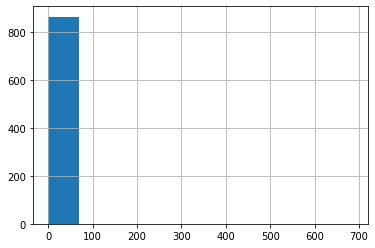

In [36]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count